Math 5750/6880: Mathematics of Data Science \\
Project 1

# 3. Python and Google Colab
Project Euler Problem  
https://projecteuler.net/

In [5]:
# Problem 719
# We define an S-number to be a natural number, n, that is a perfect square and its square root can be obtained by
# splitting the decimal representation of n into 2 or more numbers then adding the numbers. For example, 81 is an
# S-number because sqrt(81)=8+1. Further we define T(N) to be the sum of all S numbers n≤N. You are given T(10^4) = 41333. Find T(10^12).

import numpy as np
import math

def is_S_number(n: int) -> bool:
  if (is_perfect_square(n)):
    root = math.isqrt(n)
    digits = np.array(list(str(n)), dtype=int)
    # forgot: need to check all partition options -- check algos
    sum = np.sum(digits)
    if (root == sum):
      return True
    else:
      return False
  else:
    return False

def is_perfect_square(n: int) -> bool:
  if (n < 0):
    return False
  root = int(math.isqrt(n))
  return (root * root == n)

def find_T(limit: int) -> int:
  total = 0
  for i in range(1, math.isqrt(limit) + 1):
    if (is_S_number(i)):
      total += i*i
  return total

# testing
print(is_S_number(81))
print(is_S_number(47))
print(find_T(4))
print(find_T(10000))





True
False
1
6562


# 4. Regression Analysis
California housing data  
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler


In [26]:
# Load the California housing data
cal = fetch_california_housing(as_frame=True)
X, y = cal.data, cal.target
feature_names = X.columns
print(feature_names)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


Test R^2: 
0.5943232652466202
MAE: 
0.535126133655451
RMSE: 
0.7273129773603114


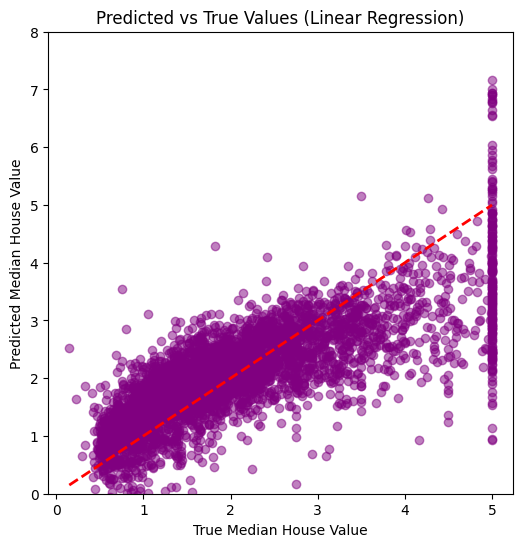

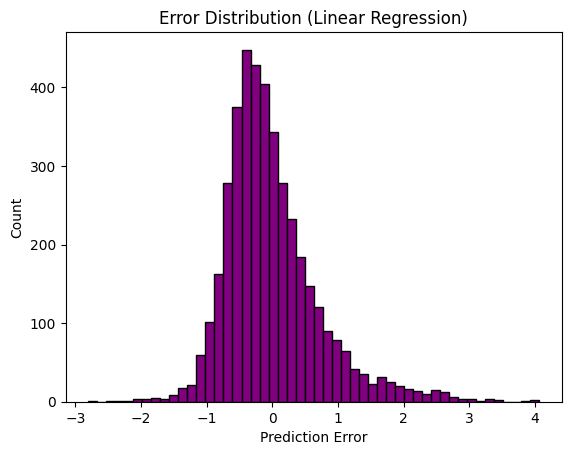

Importance: 
Latitude     -0.900421
Longitude    -0.870586
MedInc        0.826248
AveBedrms     0.290387
AveRooms     -0.248911
HouseAge      0.117101
AveOccup     -0.030564
Population   -0.008643
dtype: float64
Test R^2: 
0.7712951595872668
MAE: 
0.3686634136501486
RMSE: 
0.5460959602847307


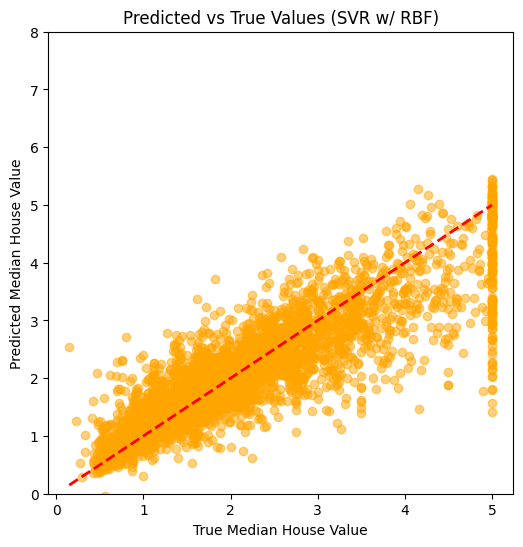

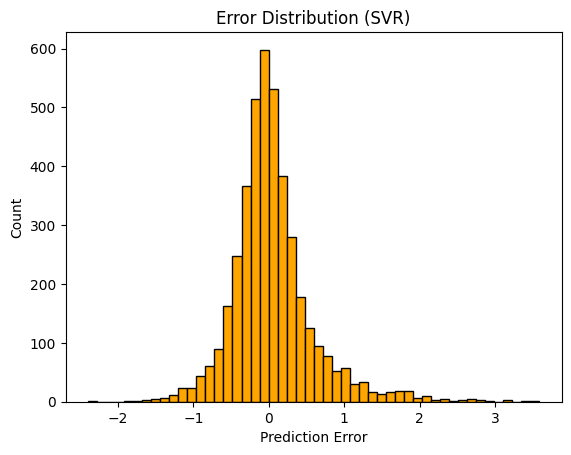

Test R^2: 
0.7987926125476462
MAE: 
0.33474368183139563
RMSE: 
0.5122161255275408


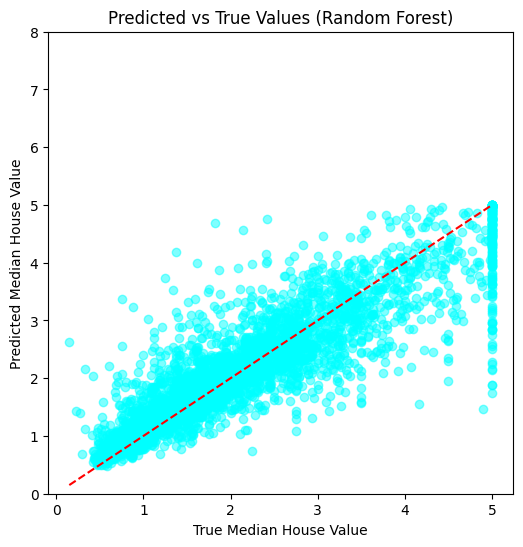

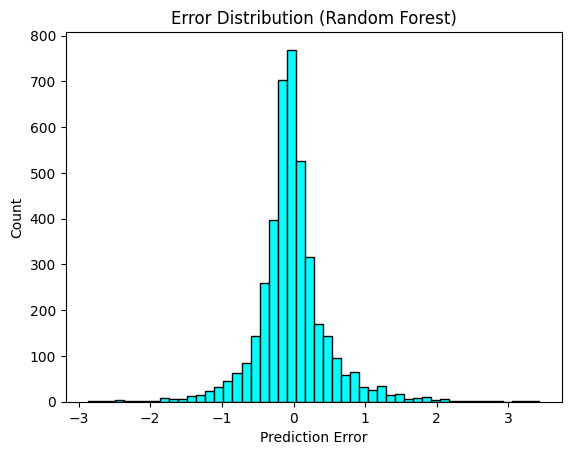

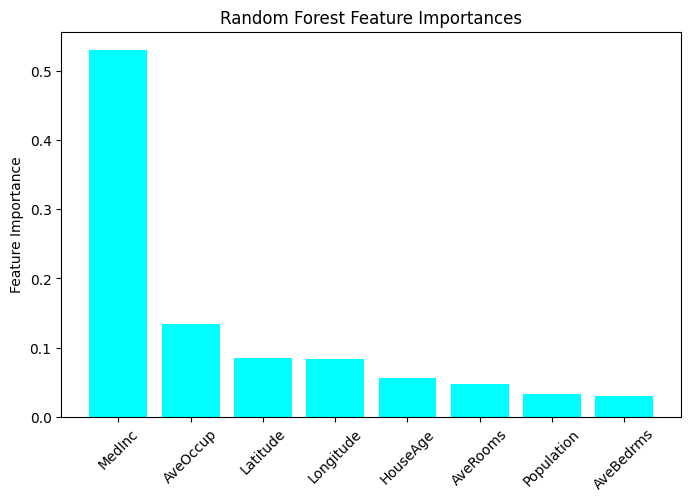

In [36]:
# Perform regression and get values of r2, mae, rmse
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_prediction_train = lin_reg.predict(X_train)
y_prediction_test = lin_reg.predict(X_test)

r2_train = r2_score(y_train, y_prediction_train)
r2_test = r2_score(y_test, y_prediction_test)
mae = mean_absolute_error(y_test, y_prediction_test)
rmse = np.sqrt(mean_squared_error(y_test, y_prediction_test))

print("Test R^2: ")
print(r2_test)
print("MAE: ")
print(mae)
print("RMSE: ")
print(rmse)

# Scatter plot
plt.figure(figsize=(6,6))
plt.ylim(top=8)
plt.scatter(y_test, y_prediction_test, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)  # ideal line
plt.xlabel("True Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs True Values (Linear Regression)")
plt.show()

# Histogram
errors = y_test - y_prediction_test
plt.hist(errors, bins=50, color='purple', edgecolor='k')
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.title("Error Distribution (Linear Regression)")
plt.show()

# Feature importance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lin_reg_scaled = LinearRegression()
lin_reg_scaled.fit(X_train_scaled, y_train)

importance = pd.Series(lin_reg_scaled.coef_, index=feature_names)
importance_abs_sorted = importance.reindex(importance.abs().sort_values(ascending=False).index)
print("Importance: ")
print(importance_abs_sorted)

# Other models ---------------------------------------

# SVR
svr = make_pipeline(StandardScaler(), SVR(kernel="rbf", C=10, epsilon=0.2, gamma="scale"))
svr.fit(X_train, y_train)
y_prediction_svr = svr.predict(X_test)

svr_r2 = r2_score(y_test, y_prediction_svr)
svr_mae = mean_absolute_error(y_test, y_prediction_svr)
svr_rmse = np.sqrt(mean_squared_error(y_test, y_prediction_svr))

print("Test R^2: ")
print(svr_r2)
print("MAE: ")
print(svr_mae)
print("RMSE: ")
print(svr_rmse)

plt.figure(figsize=(6,6))
plt.ylim(top=8)
plt.scatter(y_test, y_prediction_svr, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)  # ideal line
plt.xlabel("True Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs True Values (SVR w/ RBF)")
plt.show()

# NOTE: This was how I got the feature importance data for SVR, I only ran it the one time because it took forever
# result = permutation_importance(svr, X_test, y_test, n_repeats=10, random_state=0)
# importances = pd.Series(result.importances_mean, index=X.columns)
# importances = importances.abs().sort_values(ascending=False)
# print("Importance: ")
# print(importances)

errors = y_test - y_prediction_svr
plt.hist(errors, bins=50, color='orange', edgecolor='k')
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.title("Error Distribution (SVR)")
plt.show()

# Random Forest
forest = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
y_prediction_forest = forest.predict(X_test)

forest_r2 = r2_score(y_test, y_prediction_forest)
forest_mae = mean_absolute_error(y_test, y_prediction_forest)
forest_rmse = np.sqrt(mean_squared_error(y_test, y_prediction_forest))

print("Test R^2: ")
print(forest_r2)
print("MAE: ")
print(forest_mae)
print("RMSE: ")
print(forest_rmse)

plt.figure(figsize=(6,6))
plt.ylim(top=8)
plt.scatter(y_test, y_prediction_forest, alpha=0.5, color='cyan')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("True Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs True Values (Random Forest)")
plt.show()

errors = y_test - y_prediction_forest
plt.hist(errors, bins=50, color='cyan', edgecolor='k')
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.title("Error Distribution (Random Forest)")
plt.show()

importances = forest.feature_importances_
sorted_imp = np.argsort(importances)[::-1]
plt.figure(figsize=(8,5))
plt.bar(range(X.shape[1]), importances[sorted_imp], align="center", color='cyan')
plt.xticks(range(X.shape[1]), X.columns[sorted_imp], rotation=45)
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()




# 5. Classification Analysis
Diagnostic Wisconsin Breast Cancer Database  
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, average_precision_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve

In [42]:
# Load Breast Cancer Wisconsin Dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target                  # 0 = malignant, 1 = benign
feature_names = X.columns
label_names = {0: "malignant", 1: "benign"}
print(feature_names)

# Train/Test Split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Preprocess Data (fit on train ONLY; then transform both)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)   # fit on train
X_test_std  = scaler.transform(X_test)        # transform test with train stats

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


Test Accuracy: 
0.9649122807017544
ROC AUC: 
0.9933862433862434
Average Precision: 
0.996034858620338


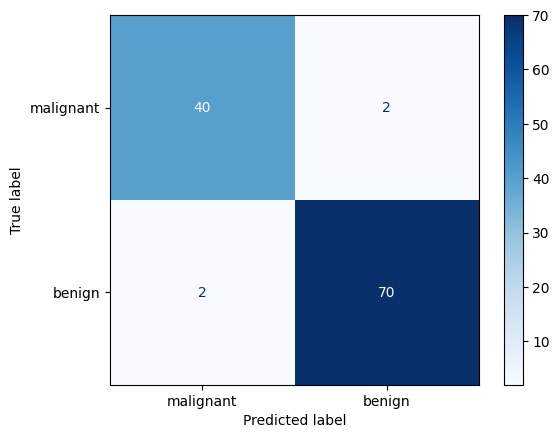

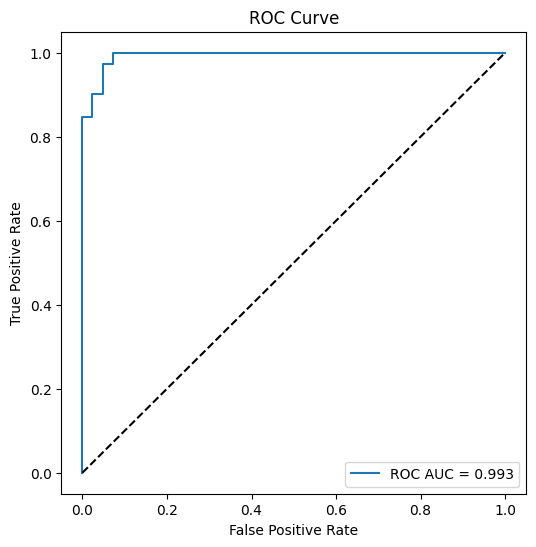

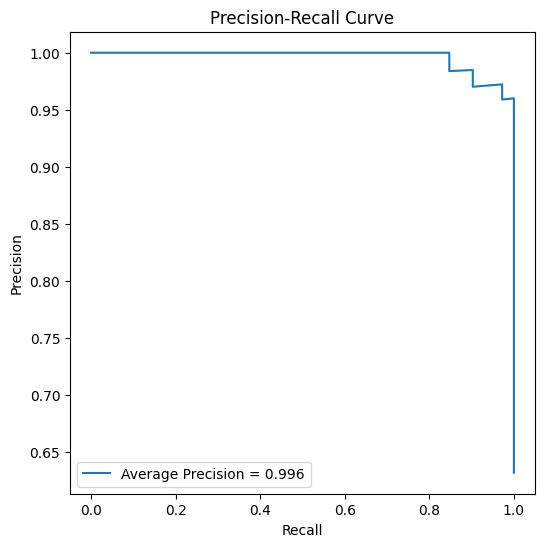

Top 10 important features: 
mean concave points        0.967260
radius error               0.944002
worst fractal dimension    0.917051
worst texture              0.908194
fractal dimension error    0.785565
worst concavity            0.772508
mean concavity             0.650475
concave points error       0.634202
worst radius               0.628881
area error                 0.611921
dtype: float64


In [43]:
svm_classif = SVC(kernel='rbf', probability=True, random_state=0)
svm_classif.fit(X_train_std, y_train)
y_predict = svm_classif.predict(X_test_std)
y_proba = svm_classif.predict_proba(X_test_std)[:, 1]

acc = accuracy_score(y_test, y_predict)
roc = roc_auc_score(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

print("Test Accuracy: ")
print(acc)
print("ROC AUC: ")
print(roc)
print("Average Precision: ")
print(ap)

cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(cm, display_labels=["malignant", "benign"])
disp.plot(cmap="Pinks")

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6,6))
plt.plot(recall, precision, label=f"Average Precision = {ap:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

# Feature importance
linear_svm = SVC(kernel='linear', probability=True, random_state=0)
linear_svm.fit(X_train_std, y_train)

importance = np.abs(linear_svm.coef_[0])
feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)
print("Top 10 important features: ")
print(feature_importance.head(10))
